## REGERESIÓN LINEAL

# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression

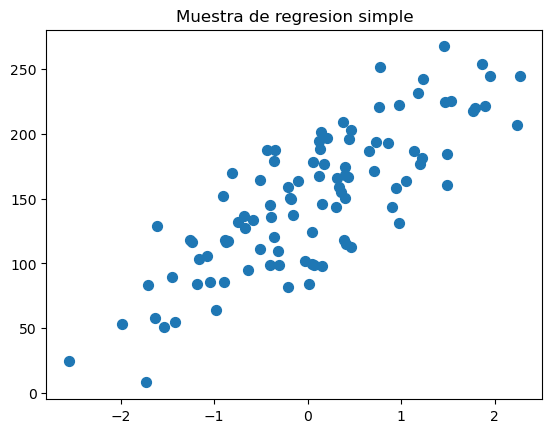

In [3]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Muestra de regresion simple')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

In [5]:
print('modelo lineal coef B: {}'.format(linreg.coef_))
print('modelo lineal interseccion Bo: {}'.format(linreg.intercept_))
print('modelo lineal exactitud entrenamiento: {}'.format(linreg.score(X_train, y_train)))
print('modelo lineal exactitud comprobación: {}'.format(linreg.score(X_test, y_test)))


modelo lineal coef B: [45.70870465]
modelo lineal interseccion Bo: 148.44575345658873
modelo lineal exactitud entrenamiento: 0.6785950771141656
modelo lineal exactitud comprobación: 0.4915961593493031


### Gráfico lineal con líne de tendencia ajustada

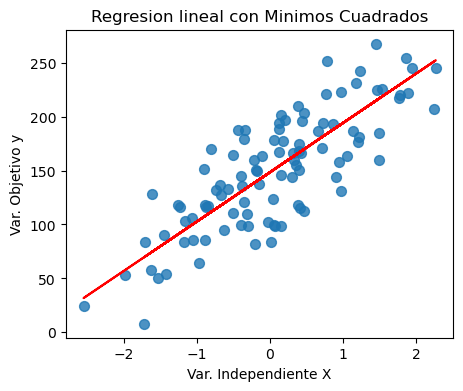

In [6]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.intercept_ + linreg.coef_*X_R1, 'r-')
plt.title('Regresion lineal con Minimos Cuadrados')
plt.xlabel('Var. Independiente X')
plt.ylabel('Var. Objetivo y')
plt.show()


In [9]:
def funcion_distribucion(ROJO, AZUL, ROJO_N, AZUL_N, Titulo):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    sns.kdeplot(ROJO, color="b", label=ROJO_N)
    sns.kdeplot(AZUL, color="r", label=AZUL_N)

    plt.title(Titulo)
    plt.xlabel('y (Target)')
    plt.ylabel('Proporcion de casos')
    plt.legend()  
    plt.show()
    plt.close()

In [10]:
y_pred_train = linreg.predict(X_train)
Titulo = 'Curva de Distribución Entrenamiento'

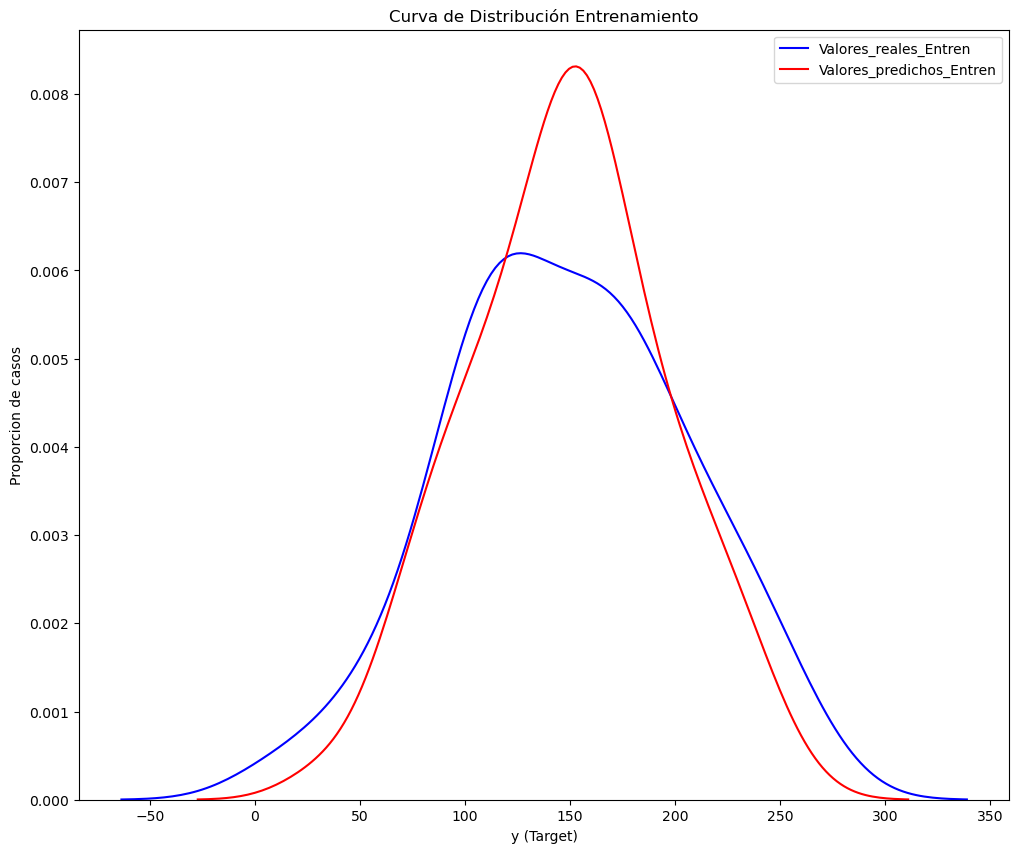

In [11]:
%matplotlib inline
funcion_distribucion(y_train, y_pred_train, "Valores_reales_Entren", "Valores_predichos_Entren", Titulo)

In [12]:
y_pred_est = linreg.predict(X_test)
Titulo = 'Curva de Distribución Comprobación'

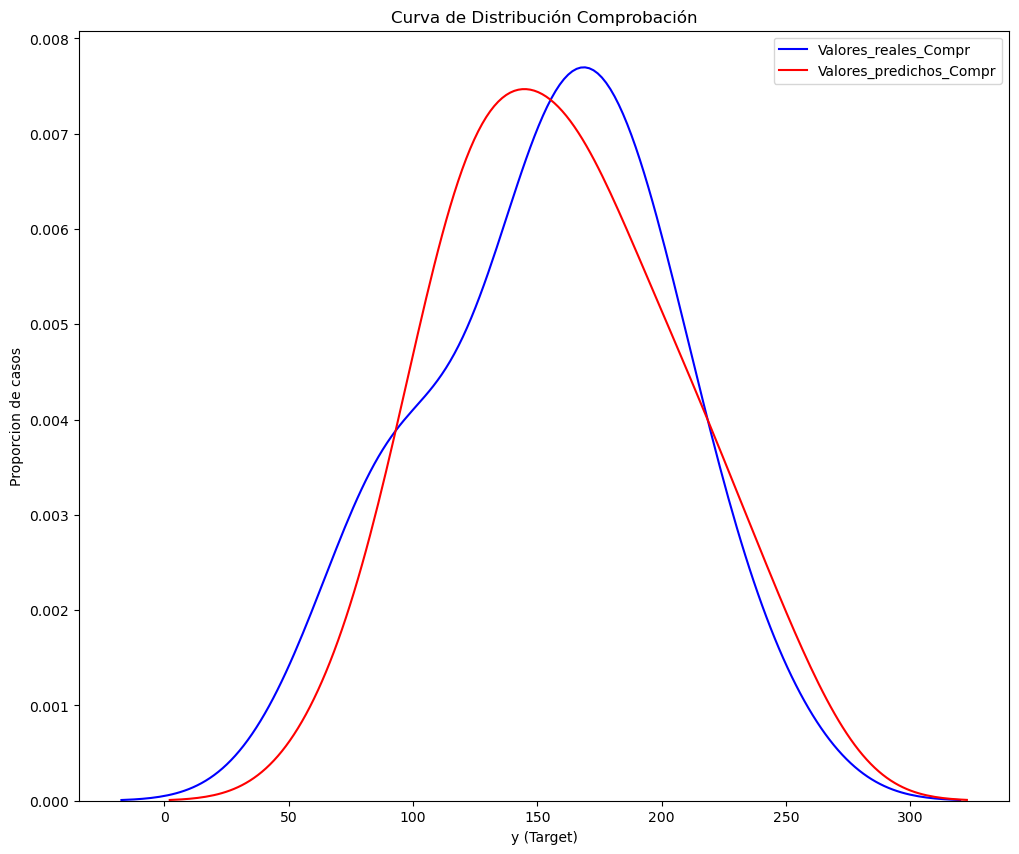

In [13]:
%matplotlib inline
funcion_distribucion(y_test, y_pred_est, "Valores_reales_Compr", "Valores_predichos_Compr", Titulo)

In [31]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_162/3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [32]:
X_boston = data
y_boston = target

In [33]:
X_boston.shape

(506, 13)

In [34]:
y_boston

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
from sklearn.linear_model import LinearRegression


### Regularización

In [20]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3, random_state = 0)

linridge = Ridge(alpha=2.0).fit(X_train, y_train)

print('Datos boston')
print('Modelo de Regresion regularizada RIDGE, INTERSECCION: {}'
     .format(linridge.intercept_))
print('Modelo de Regresion regularizada RIDGE, pendiente:\n{}'
     .format(linridge.coef_))
print('R-cuadrado score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-cuadrado score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))


Datos boston
Modelo de Regresion regularizada RIDGE, INTERSECCION: 30.918588650084452
Modelo de Regresion regularizada RIDGE, pendiente:
[-0.11734115  0.04678389 -0.03168431  2.37190005 -5.54566463  3.88355773
 -0.02034958 -1.36243701  0.21164337 -0.01188067 -0.90409538  0.00743148
 -0.49867367]
R-cuadrado score (training): 0.761
R-cuadrado score (test): 0.663


## Normalizacion

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3,  random_state = 0)

scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train) # generando la normalizacion a partir del entrenamiento
X_test_scaler = scaler.transform(X_test) 

linridge =  Ridge(alpha=2).fit(X_train_scaler, y_train)

print('Datos boston')
print('Modelo de Regresion regularizada RIDGE, intercsion: {}'
     .format(linridge.intercept_))
print('Modelo de Regresion regularizada RIDGE, pendiente:\n{}'
     .format(linridge.coef_))
print('R-cuadrado score (training): {:.3f}'
     .format(linridge.score(X_train_scaler, y_train)))
print('R-cuadrado score (test): {:.3f}'
     .format(linridge.score(X_test_scaler, y_test)))

Datos boston
Modelo de Regresion regularizada RIDGE, intercsion: 27.423056670682975
Modelo de Regresion regularizada RIDGE, pendiente:
[ -5.24683389   3.04442028  -1.20462351   2.93292175  -4.62279156
  16.48454379  -0.74216758 -10.25734194   3.07420516  -3.98965071
  -9.38298813   2.8416034  -16.06785567]
R-cuadrado score (training): 0.751
R-cuadrado score (test): 0.651


## Efecto de la eleccion de alpha

In [ ]:
for alpha_i in [0.0001, 0.001, 0.01, 0, 1, 2, 3, 4, 5, 20]:
    linridge = Ridge(alpha=alpha_i).fit(X_train_scaler, y_train)
    r2_train = linridge.score(X_train_scaler, y_train)
    r2_test = linridge.score(X_test_scaler, y_test)
    num_efec_gr = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.4f}\nnum abs(coeff) > 1.0: {}, \r-cuadrado entrenamiento: {:.2f}, r-cuadrado comprobacion: {:.2f}\n'.format(alpha_i, num_efec_gr, r2_train, r2_test))

### Regularización Lasso

In [ ]:
from sklearn.linear_model import Lasso

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3, random_state = 0)

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

linlasso = Lasso(alpha=0.1, max_iter = 10000).fit(X_train_scaler, y_train)

print('Regresion Laso ML interseccion: {}'
     .format(linlasso.intercept_))
print('Regresion Laso ML efecto:\n{}'
     .format(linlasso.coef_))
print('Efectos <> cero: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-cuadrado score (entrenamiento): {:.3f}'
     .format(linlasso.score(X_train_scaler, y_train)))
print('R-cuadrado score (comprobación): {:.3f}\n'
     .format(linlasso.score(X_test_scaler, y_test)))
print('Efectos <> cero transformados :')

for e in sorted (list(zip(list(X_boston), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

### Regresion polinómica

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Para dibujar un scatterplot
def scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='Entrenamiento')
    plt.scatter(X_test, y_test, label='Comprobacion')
    plt.legend(loc=4);

scatter()    

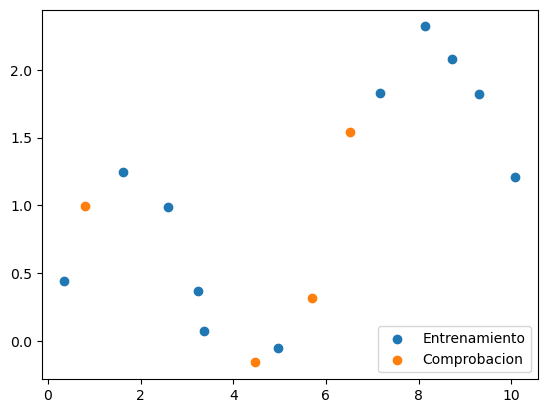

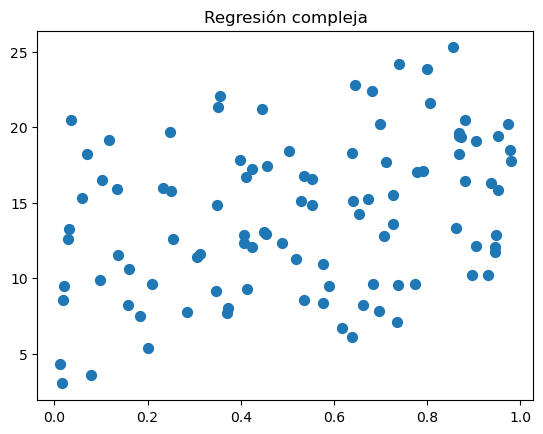

In [24]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Regresión compleja')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 4], y_F1, marker= 'o', s=50)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('ML (modelo lineal) efecto (b): {}'
     .format(linreg.coef_))
print('ML interseccion (a): {:.3f}'
     .format(linreg.intercept_))
print('R-cuadrado score (entrenamiento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-cuadrado score (comprobacion): {:.3f}'
     .format(linreg.score(X_test, y_test)))


ML (modelo lineal) efecto (b): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
ML interseccion (a): 1.543
R-cuadrado score (entrenamiento): 0.722
R-cuadrado score (comprobacion): 0.722


In [26]:

print('\nAdicion de nuevos efectos polinómicos, grado 2 o cuadratico )\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) ML efecto (b):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) ML interseccion (a): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (entrenamiento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (comprobacion): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nEl increneto de nuevas variables polinómicas \n\
mejora la precisión, pero reduce la generalizacion\n\
po lo que deben utilizarse en conjunto regularizaciones como RIDGE\n')



Adicion de nuevos efectos polinómicos, grado 2 o cuadratico )

(poly deg 2) ML efecto (b):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) ML interseccion (a): -3.206
(poly deg 2) R-squared score (entrenamiento): 0.969
(poly deg 2) R-squared score (comprobacion): 0.805


El increneto de nuevas variables polinómicas 
mejora la precisión, pero reduce la generalizacion
po lo que deben utilizarse en conjunto regularizaciones como RIDGE



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge(alpha=1).fit(X_train, y_train)

print('(poly grado 2 + ridge) ML efecto (b):\n{}'
     .format(linreg.coef_))
print('(poly grado 2 + ridge) ML interseccion (a): {:.3f}'
     .format(linreg.intercept_))
print('(poly grado 2 + ridge) R-cuadrado score (entrenamiento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly grado 2 + ridge) R-cuadrado score (comprobacion): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly grado 2 + ridge) ML efecto (b):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly grado 2 + ridge) ML interseccion (a): 5.418
(poly grado 2 + ridge) R-cuadrado score (entrenamiento): 0.826
(poly grado 2 + ridge) R-cuadrado score (comprobacion): 0.825


In [ ]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
Input=[('scale',MinMaxScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',Ridge())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', MinMaxScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [30]:
pipe.score(X_test, y_test)

0.8088069276582709

Para el modelo de datos de Boston, realice un modelo lineal, polinomico de grado 2, con regularizacion Ridge

In [38]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.3, random_state = 0)
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
Input=[('scale',MinMaxScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',Ridge())]
pipe=Pipeline(Input)

pipe.fit(X_train_boston,y_train_boston)
pipe.score(X_test_boston, y_test_boston)

0.7839951392528726